In [34]:
import pygrib
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt
import math

def lat_to_index(lat):
    if lat > 0 :
        return math.floor(2 * (90 - lat))
    return math.floor(2 * (90 + lat))

def lon_to_index(lon):
    return math.floor((lon % 360) * 2)

# Californian map :
cal_bbox = {'north': 42.009517, 'south': 32.528832, 'west': -124.482003, 'east': -114.131211}
noaa_ids = {k: lat_to_index(v) for k, v in cal_bbox.items() if k in ('north', 'south')}
noaa_ids.update({k: lon_to_index(v) for k, v in cal_bbox.items() if k in ('west', 'east')})

local_file = 'local.grb2_03'
grbs = pygrib.open(local_file)
data = grbs.select(name='Temperature')[37]['values']

{'north': 95, 'south': 114, 'west': 471, 'east': 491}


## Map of temperature in California

In [ ]:
import matplotlib
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import os


m=Basemap(projection='mill',
          lat_ts=10,
          llcrnrlon=cal_bbox['west'],
          urcrnrlon=cal_bbox['east'],
          llcrnrlat=cal_bbox['south'],
          urcrnrlat=cal_bbox['north'],
          resolution='i')

# convert the lat/lon values to x/y projections.
lats = np.arange(cal_bbox['south'], cal_bbox['north'], 0.5)
lons = np.arange(cal_bbox['west'], cal_bbox['east'], 0.5)

x, y = m(*np.meshgrid(lons,lats))
plt.figure(figsize=(12,16))

cal_data = data[noaa_ids['north']:noaa_ids['south'], 
                noaa_ids['west']:noaa_ids['east']]


m.pcolormesh(x, y, cal_data, shading='flat', cmap=plt.cm.jet, vmin = 275, vmax = 300)
m.colorbar(location='right')


# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents(alpha=0.5)
m.drawmapboundary()
m.bluemarble()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Temperature')
plt.show()

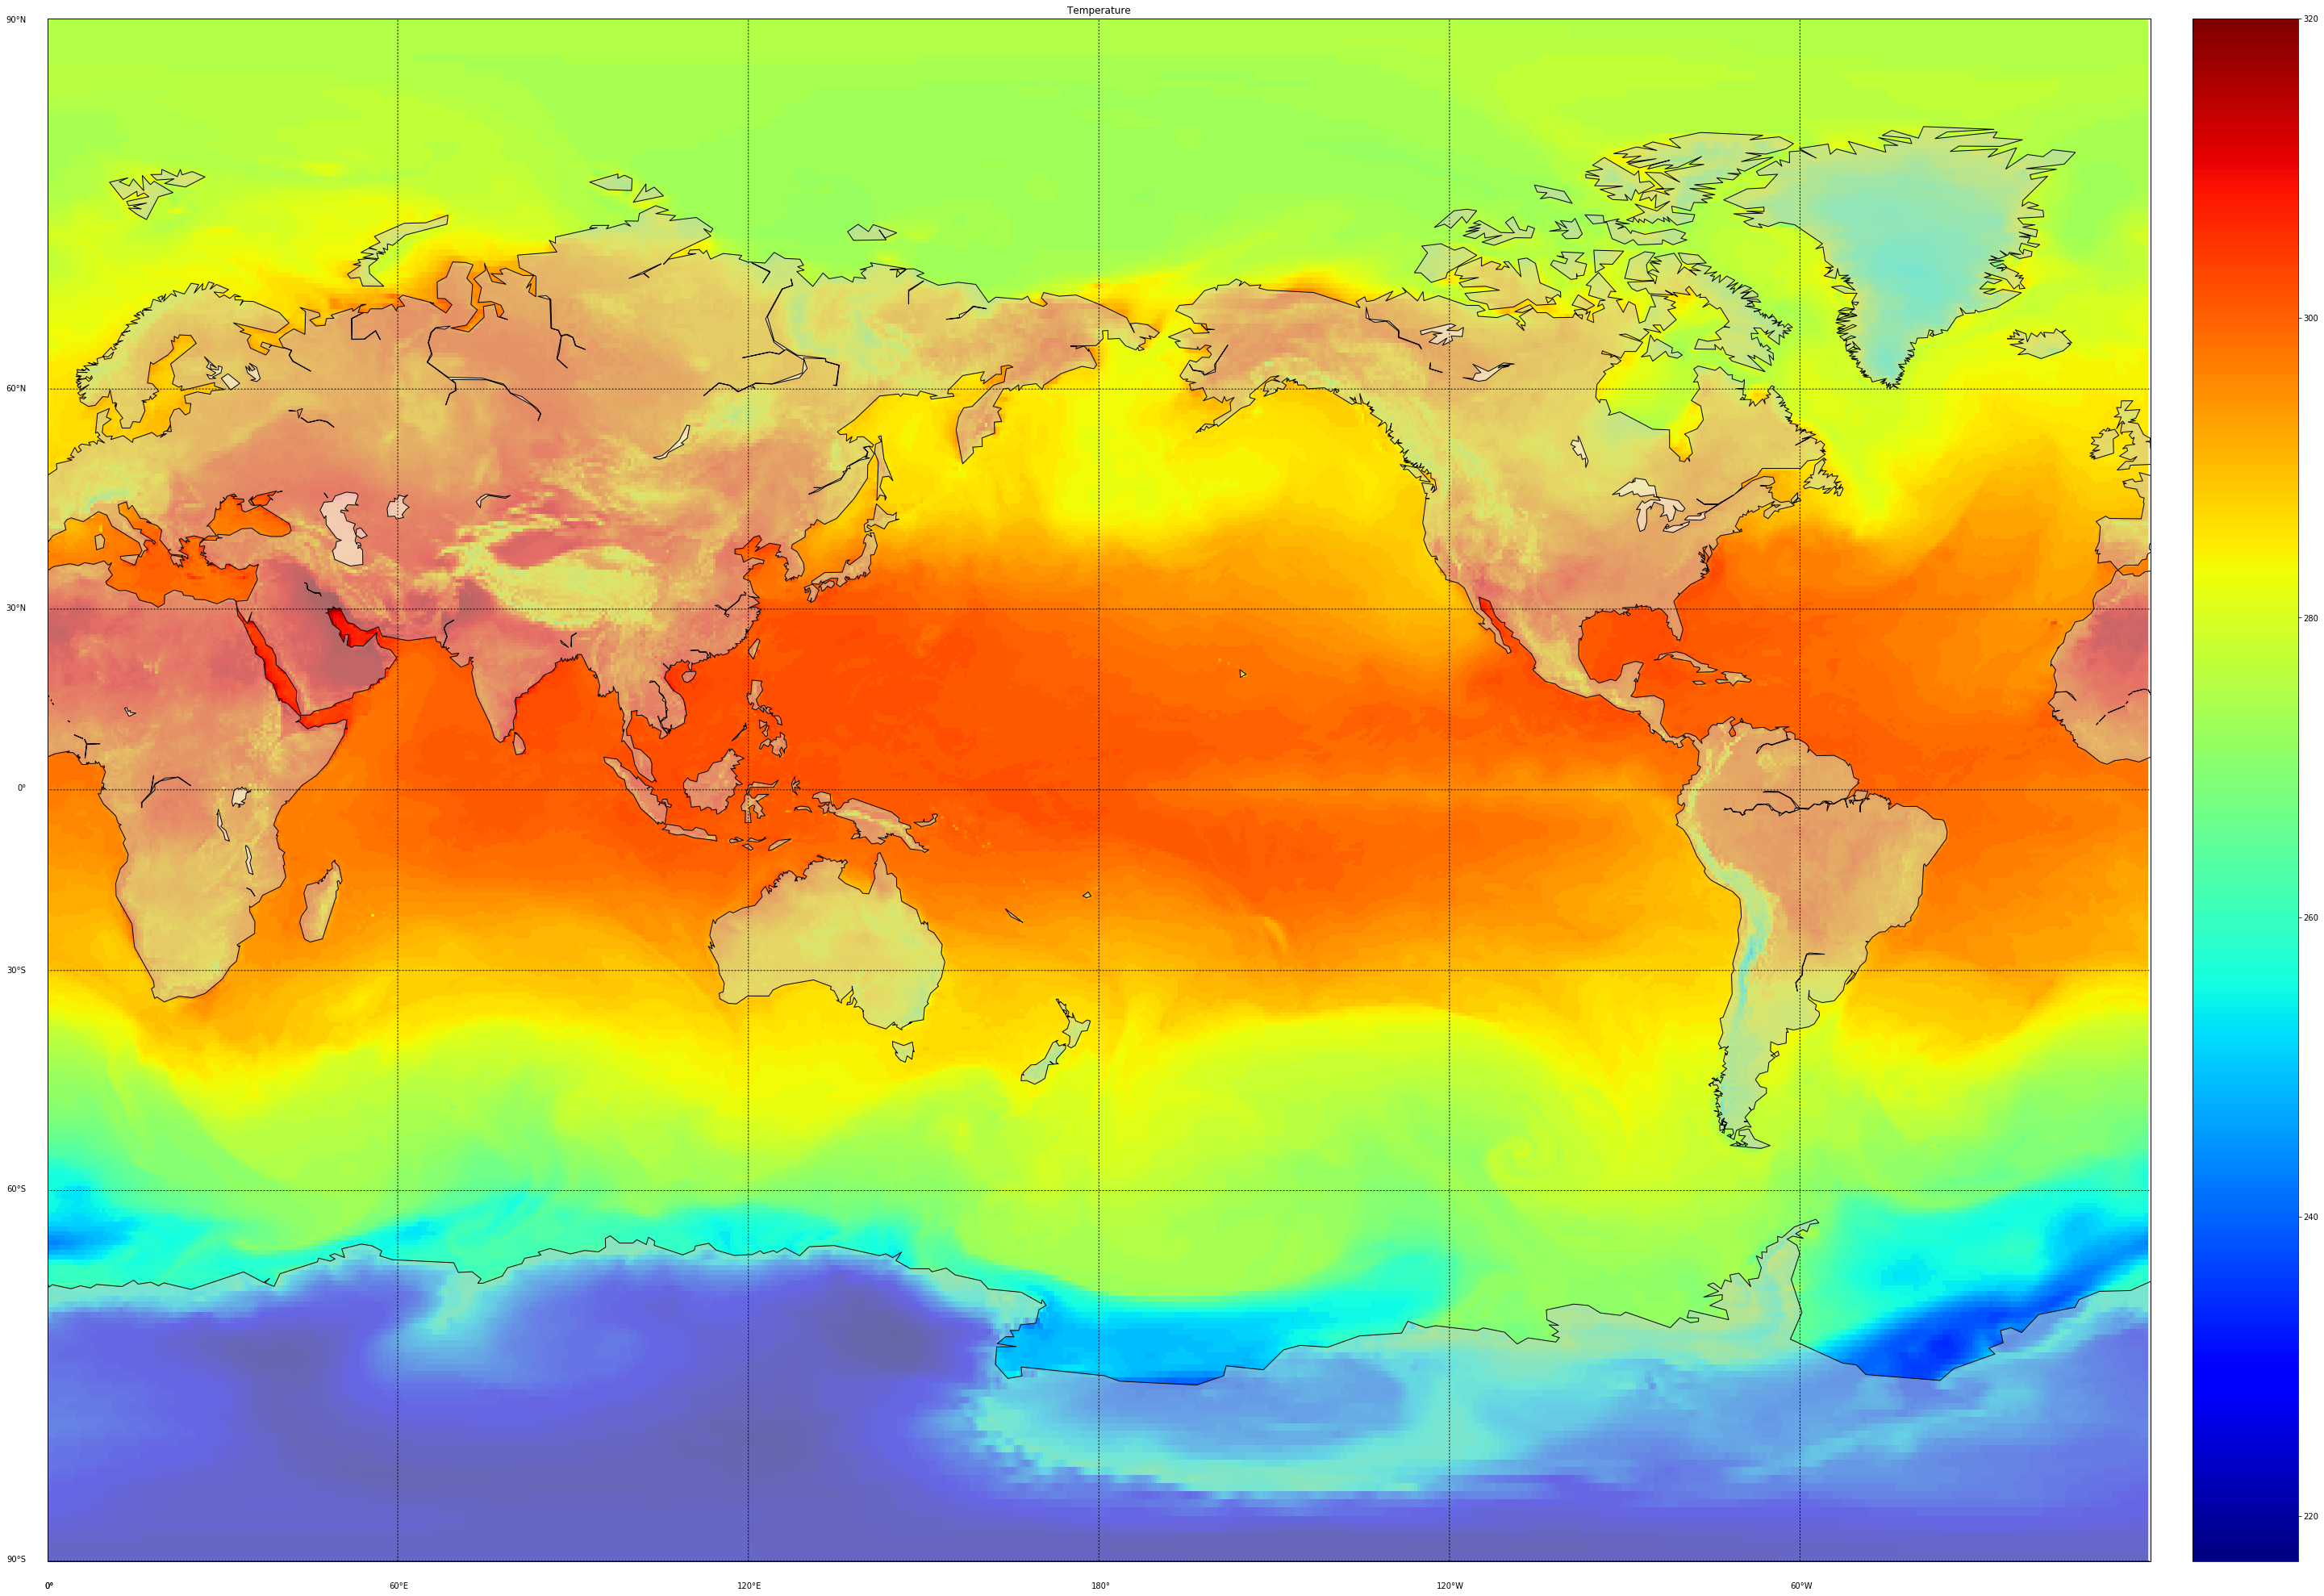

In [44]:
world_bbox = {'north': 90, 'south': -90, 'east': 0, 'west': 360}

m=Basemap(projection='mill',
          lat_ts=1,
          llcrnrlon=world_bbox['east'],
          urcrnrlon=world_bbox['west'],
          llcrnrlat=world_bbox['south'],
          urcrnrlat=world_bbox['north'],
          resolution='c')

# convert the lat/lon values to x/y projections.
lats = np.arange(world_bbox['north'], world_bbox['south'] - 0.5, -0.5)
lons = np.arange(world_bbox['east'], world_bbox['west'], 0.5)

x, y = m(*np.meshgrid(lons,lats))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.
plt.figure(figsize=(50, 50))
m.pcolormesh(x, y, data[:,:],shading='flat', cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.
m.drawcoastlines()
m.fillcontinents(alpha=0.5)
m.drawmapboundary()

m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.
plt.title('Temperature')
plt.show()